Random Forest requires prior knowledge like CART(Classification and Regression Trees). Therefore, please complete Decision Tree for Regression and Classification before getting into Random Forest not to get confused later.

# Decision Tree Recap

Firstly, as you may have already known that Decision Tree can be applied in two ways such as Regression and Classification.

Decision Tree is a non-linear model built by constructing many linear boundaries

Important!<br>
Information Gain is used while building any tree for regression or classification. For any feature, the higher the Information Gain the more important the feature is. Information Gain uses Gini or Entropy measurements for classification and MSE(Mean Squared Error) or MAE(Mean Absolute Error) for regression in Decision Tree. <br>
The lower the Entropy or its equivalent(Gini, etc) the higher the Information Gain. Therefore, a feature with lowest Entropy has the highest Information Gain.

# Random Forest Concept

The Random Forest is a model which combines many Decision Tree models and trains each model with slightly different set of samples. Final prediction of Random Forest model is calculated by averaging the predictions of each Decision Tree model.

There are TWO main techniques used to create a Random Forest:

 <font color="red">Random Sampling of Observations

Random Sampling includes technique such as Bagging and Boosting

<font color="red">Bagging</div>

Bagging(also referred as Bootstrap Aggregation) is a technique used to decrease variance in the dataset by splitting the dataset into multiple datasets. In order to split dataset, it is allowed to repeat  certain sample for several datasets. After splitting, each dataset is used for Decision Tree. Therefore, we end up with many Decision Trees which form an Ensemble method.

Boosting is discussed later

 <font color="red">Random Subset of Features

It is one more step which takes random selection of features rather than using all the features to form a Decision Tree. Quantity of features to use is usually Square Root of amount of all features. For example: if we have 9 features in the dataset, only 3 features are randomly chosen for each Decision Tree.

The reason why Random Forest model is better than Decision Tree model can be explained by the following example.<br>
Let's say the Company needs to predict weather for next month and they hired 100 specialists for that. Each specialist has own method of forecasting weather and methods are different depending on the specialist using it. So, Company takes all the predictions from specialists and get the average(or vote) in order to get the better prediction without low bias and variance.

In [0]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/loNcrMjYh64" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Random Forest in Python

Let's use same dataset as we used for Decision Tree Regression questions(FIFA). A model with single Decision Tree was 78% accurate, but we tuned parameters and made it to 84% accuracy. Now, let's consider same features and labels(Potential) and test them with Random Forest Regression

Now, we will import the dataset and normilize the data for model

In [0]:
import pandas as pd
import numpy as np

In [0]:
#Importing the dataset and selecting necessary features
fifa_dataset = pd.read_csv("fifa19_data.csv")
columns_needed = ['Name', 'Age', 'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Preferred Foot', 'Skill Moves', 'Work Rate',]
fifa_dataset = fifa_dataset[columns_needed]
fifa_dataset.head()

,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,Skill Moves,Work Rate
0,L. Messi,31,94,94,FC Barcelona,€110.5M,€565K,Left,4.0,Medium/ Medium
1,Cristiano Ronaldo,33,94,94,Juventus,€77M,€405K,Right,5.0,High/ Low
2,Neymar Jr,26,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,High/ Medium
3,De Gea,27,91,93,Manchester United,€72M,€260K,Right,1.0,Medium/ Medium
4,K. De Bruyne,27,91,92,Manchester City,€102M,€355K,Right,4.0,High/ High


In [0]:
#Splitting dataset into features(IV) and labels(DP)
iv_columns = ['Age', 'Overall', 'Value', 'Wage', 'Preferred Foot', 'Work Rate', 'Skill Moves']
X = fifa_dataset.loc[:, iv_columns]
y = fifa_dataset.iloc[:, 3]

In [0]:
#Checking if any features has empty label
X.isnull().any()

Age               False
Overall           False
Value             False
Wage              False
Preferred Foot     True
Work Rate          True
Skill Moves        True
dtype: bool

In [0]:
#Filling up the empty values in samples
X['Preferred Foot'].fillna("Right", inplace=True)
X['Work Rate'].fillna("Medium/ Medium", inplace=True)
X['Skill Moves'].fillna(X['Skill Moves'].mean(), inplace=True)

In [0]:
#Making sure no data is missing
X.isnull().any()

Age               False
Overall           False
Value             False
Wage              False
Preferred Foot    False
Work Rate         False
Skill Moves       False
dtype: bool

In [0]:
#Encoding labels
from sklearn.preprocessing import LabelEncoder
categories_to_encode = ['Preferred Foot', 'Work Rate']
label_encoder = LabelEncoder();
for i in categories_to_encode:
    X[i] = label_encoder.fit_transform(X[i])
X['Value'] = X['Value'].str.replace('K', '') #removing 'K' sign from Value
X['Value'] = X['Value'].str.replace('€', '') #removing '€' sign from Value
X['Value'] = X['Value'].str.replace('M', '') #removing 'M' sign from Value
X['Wage'] = X['Wage'].str.replace('K', '') #removing 'K' sign from Wage
X['Wage'] = X['Wage'].str.replace('€', '') #removing '€' sign from Wage

In [0]:
#Splitting IV and DP into Train and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Parameters to consider in Random Forest Regression model:<br>
n_estimators(default=10) - Number of Trees in the Forest<br>
criterion(default=MSE) - To measure quality of split(Can be MAE-Mean Absolute Error)<br>
max_depth - Depth of the Tree(explained in Decision Tree)
bootstrap - True or False(for Bagging)

In [0]:
#Creating Random Forest model and fitting the data
from sklearn.ensemble import RandomForestRegressor
rf_1 = RandomForestRegressor(bootstrap=False, random_state=1)
rf_1.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [0]:
rf_1.score(X_test, y_test)

0.9417759714994348

Wow, we got 94% accuracy without using Bagging technique. Now, let's tune the parameters more

In [0]:
rf_2 =  RandomForestRegressor(random_state=1)
rf_2.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [0]:
rf_2.score(X_test, y_test)

0.9613761397241765

Again WOW, the second model has reached 96% accuracy by using Bagging method

Let's increase the number of Trees in the Forest and see whether we can improve the model

In [0]:
rf_3 =  RandomForestRegressor(n_estimators=100, random_state=1) #with 100 Trees
rf_3.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [0]:
rf_3.score(X_test, y_test)

0.9635530518868123

Model has not significantly improved after increasing the number of Trees. In this case, we can choose second model over third one because third model would have much higher COST due to number of trees used 

You can play around with the model by tuning the parameters and see where the significant change is

In [0]:
age = 22
Overall = 65
Value = 100
Wage = 2
Preferred_Foot = 1
Work_Rate = 10
Skill_Moves = 2
kidocode_trainer_feature = np.array([[age, Overall, Value, Wage, Preferred_Foot, Work_Rate, Skill_Moves]])
#Let's try to predict Kidocode Trainer potential in Football
rd_2.predict(kidocode_trainer_feature)


array([62.1])

In [0]:
rf_3.predict(kidocode_trainer_feature)

array([62.33])

So, the Model predicted that Kidocode Trainer would have a potential of 62 out of 100

You might be wondering which feature is more or less impotant than the other.<br>
Here is how you can get value(or importance) of the feature in Random Forest

In [0]:
feature_importances = pd.DataFrame(rf_3.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [0]:
feature_importances

,importance
Value,0.543843
Overall,0.207700
Age,0.207384
Wage,0.023726
Skill Moves,0.010359
Work Rate,0.004800
Preferred Foot,0.002188


After we have seen how powerful Random Forest is, now we can create a model with another dataset in order to enhance our skills on Random Forest models

This is Google Play Store where android users can download free and paid apps. However, we aim to predict the price of the app depending on its features. Therefore, we only need paid apps and features such as Category, Rating, Size, number of Installs and Content Rating

In [0]:
play_store_dataset = pd.read_csv("googleplaystore.csv")

In [0]:
play_store_dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Firstly, We need to remove unnecessary columns

In [0]:
to_drop = ["App", "Genres", "Last Updated", "Current Ver", "Android Ver", "Content Rating"]
app_data_removed = play_store_dataset.drop(columns=to_drop, axis=1)

In [0]:
app_data_removed.head()
#Checking

,Category,Rating,Reviews,Size,Installs,Type,Price
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0


In [0]:
app_data_removed.isnull().any()
#Checking which columns have empty values

Category    False
Rating       True
Reviews     False
Size        False
Installs    False
Type         True
Price       False
dtype: bool

In [0]:
app_data = app_data_removed[app_data_removed["Rating"].isnull()==False]
#Removed apps without rating 

In [0]:
app_data.isnull().any()
#Apparently, Type and Rating columns had mutual empty samples

Category    False
Rating      False
Reviews     False
Size        False
Installs    False
Type        False
Price       False
dtype: bool

Since there is no empty values in any columns, we can display the dataset and normilize the columns 

In [0]:
app_data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0


Splitting into IV and DV

In [0]:
X, y = app_data.drop(columns='Rating', axis=1), app_data['Rating']

In [0]:
X.describe()

,Category,Reviews,Size,Installs,Type,Price
count,9367,9367,9367,9367,9367,9367
unique,34,5993,415,20,3,74
top,FAMILY,2,Varies with device,"1,000,000+",Free,0
freq,1747,83,1637,1577,8719,8719


Data Preprocessing

In [0]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X['Category']=encoder.fit_transform(X['Category'])

In [0]:
#There is no need to normilize the Review column

In [0]:
#Normilizing Installs column by removing + and ,
X['Installs'] = X['Installs'].str.replace("+", "")
X['Installs'] = X['Installs'].str.replace(",", "")

In [0]:
#Encoding Type column into 0 and 1
X['Type']=encoder.fit_transform(X['Type'])

In [0]:
X["Price"] = X["Price"].str.replace('$', '')
#Removing $ from price

In [0]:
#Checking the dataset
X.head()

,Category,Reviews,Installs,Type,Price
0,1,159,10000,1,0
1,1,967,500000,1,0
2,1,87510,5000000,1,0
3,1,215644,50000000,1,0
4,1,967,100000,1,0


In [0]:
#Dropping Size column temporarily
X.drop(columns='Size', axis=1, inplace=True)

In [0]:
#Dropping Installs column temporarily
X.drop(columns='Installs', axis=1, inplace=True)

In [0]:
X["Reviews"] = X["Reviews"].str.replace('3.0M', '3000000')

In [0]:
X.head()

,Category,Reviews,Installs,Type,Price
0,1,159,10000,1,0
1,1,967,500000,1,0
2,1,87510,5000000,1,0
3,1,215644,50000000,1,0
4,1,967,100000,1,0


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [0]:
X_train

,Category,Reviews,Installs,Type,Price
4779,24,56,10000,2,0.99
2834,25,11677,1000000,1,0
9939,20,3596,1000000,1,0
4132,12,5427,100000,2,4.99
450,7,9498,1000000,1,0
2014,12,470694,50000000,1,0
5328,4,2319,50000,1,0
9158,12,93870,1000000,1,0
5848,12,23,10000,1,0
706,9,32346,1000000,1,0


In [0]:
from sklearn.ensemble import RandomForestRegressor
rf_google_1 = RandomForestRegressor(random_state=1)
rf_google_1.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: 'Free'

For size, we need to convert all of them into MB(from KB) and then remove "M" letter

In [0]:
for i in X["Size"]:
    if "k" in i:
        X["Size"].tolist().find = i.replace('k', '')

AttributeError: 'list' object has no attribute 'find'

In [0]:
type(X["Size"].tolist())

list

In [0]:
for i in X["Price"]:
    if "Free" in i:
        print(i)

In [0]:

for i in X["Size"]:
    if i.find("k"):
        print(i)


19M
14M
8.7M
25M
2.8M
5.6M
19M
29M
33M
3.1M
28M
12M
20M
21M
37M
2.7M
5.5M
17M
39M
31M
14M
12M
4.2M
23M
6.0M
25M
6.1M
4.6M
4.2M
9.2M
5.2M
11M
11M
4.2M
9.2M
24M
Varies with device
11M
9.4M
15M
10M
Varies with device
1.2M
12M
24M
26M
8.0M
7.9M
25M
56M
57M
Varies with device
35M
33M
33M
5.6M
54M
201k
3.6M
5.7M
17M
8.6M
2.4M
27M
2.7M
2.5M
Varies with device
Varies with device
7.0M
35M
16M
16M
Varies with device
17M
3.4M
8.9M
3.9M
2.9M
38M
32M
37M
15M
5.4M
18M
Varies with device
38M
1.1M
Varies with device
Varies with device
7.9M
35M
Varies with device
17M
19M
14M
2.2M
4.5M
17M
14M
9.8M
21M
Varies with device
52M
14M
25M
9.0M
Varies with device
12M
Varies with device
35M
6.7M
30M
2.9M
17M
2.9M
Varies with device
Varies with device
2.6M
4.2M
7.1M
57M
22M
24M
21M
3.4M
6.4M
3.2M
8.2M
2.9M
23M
4.6M
3.1M
Varies with device
4.9M
9.5M
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
4.2M
5.4M
Varies with device
2.8M
5.0M
Varies with device
5.9M
13M
7.1M

Let's start with normilizing the label by removing Dollar sign

In [0]:
#Normilizing label.(Removing '$' signs)
y = y.str.replace('$', '')

In [0]:
y=y.astype(float)

In [0]:
y.describe()

count    800.000000
mean      13.920837
std       57.195358
min        0.990000
25%        1.490000
50%        2.990000
75%        4.990000
max      400.000000
Name: Price, dtype: float64

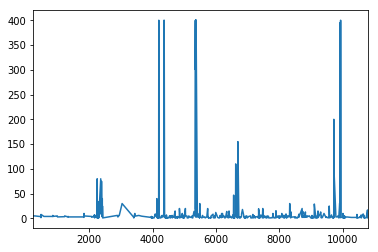

In [0]:
y.plot()

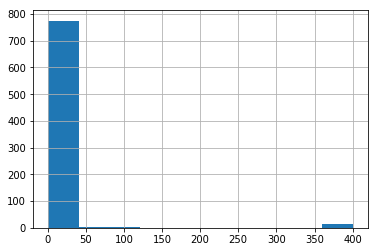

In [0]:
y.hist()

In [0]:
count = 0
for i in y:
    if i<10:
        count += 1
        
count

708

Now, let's normilize features by order starting from Category till Content Rating

Preprocessing Category column

In [0]:
X['Category'].unique()

array(['BUSINESS', 'COMMUNICATION', 'DATING', 'EDUCATION',
       'ENTERTAINMENT', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'GAME',
       'FAMILY', 'MEDICAL', 'PHOTOGRAPHY', 'SPORTS', 'PERSONALIZATION',
       'PRODUCTIVITY', 'WEATHER', 'TOOLS', 'TRAVEL_AND_LOCAL',
       'LIFESTYLE', 'AUTO_AND_VEHICLES', 'NEWS_AND_MAGAZINES', 'SHOPPING',
       'BOOKS_AND_REFERENCE', 'SOCIAL', 'ART_AND_DESIGN', 'VIDEO_PLAYERS',
       'FINANCE', 'MAPS_AND_NAVIGATION', 'PARENTING',
       'LIBRARIES_AND_DEMO', 'EVENTS'], dtype=object)

Let's use LabelEncoder from metrics class in scikit-learn to turn each category as numeric 

Checking whether values are encoded

In [0]:
X.head()

,Category,Rating,Reviews,Content Rating
234,3,4.7,11442,Everyone
235,3,4.8,10295,Everyone
290,3,4.7,11442,Everyone
291,3,4.8,10295,Everyone
427,4,4.0,18247,Everyone


Checking for missing values

In [0]:
X.isnull().any()

Category          False
Rating             True
Reviews           False
Content Rating    False
dtype: bool

Only Rating has empty values. Let's normilize it by filling up the empty values

In [0]:
X['Rating'].mean()

4.266615146831529

Since the mean is 4.2, we can replace all empty values as 4.2

In [0]:
X['Rating'].fillna(4.2, inplace=True)

Rechecking to confirm that there are no empty values

In [0]:
X.isnull().any()

Category          False
Rating            False
Reviews           False
Content Rating    False
dtype: bool

Preprocessing for Installs column

In [0]:
#removing "+" sign from values


KeyError: 'Installs'

Preprocessing for Content Rating column

In [0]:
X['Content Rating'].unique()

array(['Everyone', 'Mature 17+', 'Teen', 'Everyone 10+'], dtype=object)

In [0]:
#Encoding each of them with encoder which is object of LabelEncoder
X['Content Rating'] = encoder.fit_transform(X['Content Rating'])

Let's split the dataset into Train and Test sets with 30% for Testing

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Preprocessing is done!

Creating the Random Forest model with default 10 Trees and Fitting the Train split


In [0]:

from sklearn.ensemble import RandomForestRegressor
rf_google_1 = RandomForestRegressor(random_state=1)
rf_google_1.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [0]:
rf_google_1.score(X_test, y_test)

-0.2660570163631579

In [0]:
feature_importances = pd.DataFrame(rf_google_1.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Category,0.463379
Reviews,0.263072
Rating,0.226882
Content Rating,0.037405
Installs,0.009262


In [0]:
to_drop = ["Content Rating", "Installs", "Reviews", ""]
X.drop(columns=to_drop, inplace=True, axis=1)

In [0]:
X_train, X_test, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=1)

In [0]:
from sklearn.ensemble import RandomForestRegressor
rf_google_1 = RandomForestRegressor(random_state=1)
rf_google_1.fit(X_train, y_train1)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [0]:
rf_google_1.score(X_test, y_test)

-0.22943758892303445

In [0]:
y=y.astype(float)

In [0]:
y_train.describe()

count    560.000000
mean      12.063143
std       51.978853
min        0.990000
25%        1.490000
50%        2.990000
75%        4.990000
max      400.000000
Name: Price, dtype: float64

In [0]:
fet=X_train
fet

,Category,Rating,Reviews,Installs,Content Rating
2268,17,4.4,104,1000,3
2287,17,4.4,4207,50000,0
1001,7,4.6,3771,100000,2
9334,9,3.0,2,50,0
3993,9,4.7,2890,50000,0
5772,20,4.6,7264,100000,0
10047,26,3.3,257,5000,0
2283,17,4.5,133,10000,0
7417,12,4.4,348962,1000000,2
5341,2,4.7,1340,10000,0


In [0]:
y_train

2268       2.99
2287       3.99
1001       2.99
9334       2.99
3993       2.99
5772       1.99
10047      4.99
2283       2.99
7417       6.99
5341       4.49
6341      14.00
6088       0.99
9785       2.99
2172       0.99
5586       1.99
8085       1.99
5955       2.99
8489       0.99
8006       2.99
571        3.99
4362     399.99
7999       4.99
2422       2.99
8149       5.99
10037      1.99
8618       2.49
8723       2.99
3997       2.99
4637       3.99
4416       2.49
          ...  
2409      12.99
2266      29.99
6837      17.99
7211       2.00
10043      1.49
4367     400.00
8017       2.49
7887       4.49
5917       1.49
8950       4.99
6985       0.99
4488       0.99
6687       1.49
5411       2.99
4491       0.99
4694       7.99
4085       8.99
4716       1.99
5832       1.99
7244       0.99
10036      2.49
8021       2.49
2386      11.99
2418       2.99
8777       2.99
9592       0.99
10446      2.99
2252      11.99
4450       1.99
2150       3.99
Name: Price, Length: 560